In [2]:
import numpy as np
from matplotlib import pyplot as plt

### 3B - Always Switching

My answer for 3B is on a hand-written page.  Here, I am just testing my answer with a simulation.

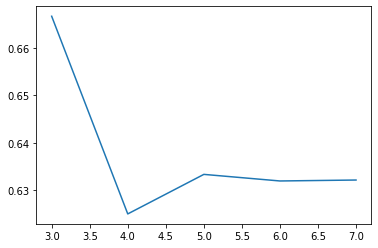

In [89]:
# exact probability
def prob(n):
    k = n - 2
    p = (n - 1) / n
    for i in range(1,k+1):
        p = 1 - p / (n - i)
    return p

plt.plot(range(3,8), [prob(ni) for ni in range(3,8)])

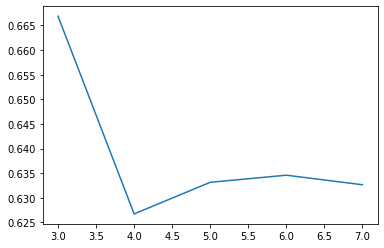

In [277]:
probs = []; ns = list(range(3, 8))
for n in ns:
    
    k = n-2
    
    # simulation of many games, n doors, k doors opened, switch every time
    reps = 99999; wins = 0
    for game in range(reps):
        car = np.random.randint(0, n)
        doors = np.zeros(n); doors[car] = 1
        goatlist = []

        # choose first door
        choice = np.random.choice(list(set(range(n))))
        for i in range(k):
            # open random goat door
            goat = np.random.choice(list(set(range(n)) - set(goatlist) - set([car, choice])))
            goatlist.append(goat)
            # switch
            choice = np.random.choice(list(set(range(n)) - set(goatlist) - set([choice])))

        if(choice == car):
            wins = wins + 1

    # experimental probability
    probs.append(wins / reps)
    
plt.plot(ns, probs)

### 3C - Switching With Probability $p$

In [13]:
# over a range of switching probabilities
win_chance = []
for p in np.arange(0, 1, 0.1):
    print(p)

    # simulation of many games, n doors, k doors opened, switch with probability p
    n = 10; k = n - 2; reps = 999; wins = 0
    for game in range(reps):
        car = np.random.randint(0, n)
        doors = np.zeros(n); doors[car] = 1
        goatlist = []

        # choose first door
        choice = np.random.choice(list(set(range(n)) - set(goatlist)))
        for i in range(k):
            # open random goat door
            goat = np.random.choice(list(set(range(n)) - set(goatlist) - set([car, choice])))
            goatlist.append(goat)
            # switch with probability p
            if(np.random.rand() < p):
                choice = np.random.choice(list(set(range(n)) - set(goatlist) - set([choice])))

        if(choice == car):
            wins = wins + 1

    # experimental probability to win, for this particular switching probability
    win_chance.append(wins / reps)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


Text(0, 0.5, 'Probability of Winning')

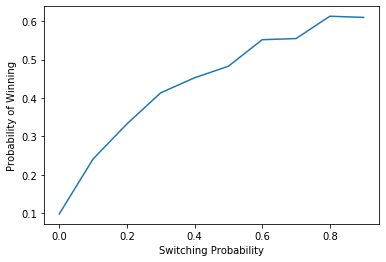

In [14]:
plt.plot(np.arange(0, 1, 0.1), win_chance)
plt.xlabel("Switching Probability")
plt.ylabel("Probability of Winning")

## 4 - Extended Monty Hall

In [86]:
# in dire need of more performance, so let's revisit the problem even though it's 5:30am friday morning ok sure good idea
def game(n, k, m, p) :
    
    # integer in [0,n-1] that represents a car
    car = np.random.randint(0, n)
    # the rest of the integers in [0,n-1]
    goats = np.array([i for i in np.arange(n) if i != car])
    # shuffle the goat doors so that we can avoid appends by drawing sequentially from randomized list
    np.random.shuffle(goats)
    
    # choose first door
    choice = np.random.randint(0, n)
    i = 0
    while(i + m <= k):
        # monty opens m doors
        i = i + m
        # choose a new door with probability p
        if(np.random.rand() < p):
            choice = np.random.choice(list(set(np.arange(n)) - set(goats[:i])))

        # if monty can't open m doors, he opens the remaining doors so k are open for last round of switching
        # this is what makes the hard line y=x in the contour plot
        if(i < k):
            # monty opens remaining k - i doors, leaving 2 closed for last round
            i = k
            # choose a new door with probability p
            if(np.random.rand() < p):
                choice = np.random.choice(list(set(np.arange(n)) - set(goats[:i])))
    
    if(choice == car):
        return 1
    else:
        return 0

Text(0.5, 1.0, 'Win Probability Contour - Yellow > Blue')

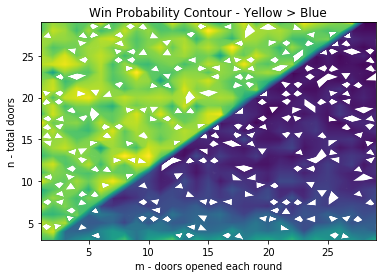

In [87]:
p = 1
reps = 100
ns = range(3,30) # range of n total doors
ms = range(1,30) # range of m doors to be opened at once

win_chance = np.zeros(shape=(len(ns),len(ms)))

# for a range of n total doors
for n in ns:
    
    k = n - 2
    
    # for a range of m doors opened at once
    for m in ms:
        
        # for multiple reps per parameter set
        wins = 0
        for rep in range(reps):    
            wins = wins + game(n, k, m, p)

        # enter average win probabilty for parameters n,m
        win_chance[n-ns[0]][m-ms[0]] = (wins / reps)

plt.contour(ms, ns, win_chance,len(ns) * len(ms))
plt.ylabel("n - total doors")
plt.xlabel("m - doors opened each round")
plt.title("Win Probability Contour - Yellow > Blue")

Text(0.5, 1.0, 'Win Probability Contour - Yellow > Blue')

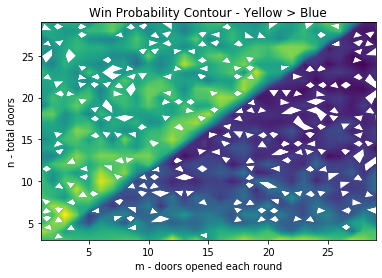

In [88]:
p = 0.5
reps = 100
ns = range(3,30) # range of n total doors
ms = range(1,30) # range of m doors to be opened at once

win_chance = np.zeros(shape=(len(ns),len(ms)))

# for a range of n total doors
for n in ns:
    
    k = n - 2
    
    # for a range of m doors opened at once
    for m in ms:
        
        # for multiple reps per parameter set
        wins = 0
        for rep in range(reps):    
            wins = wins + game(n, k, m, p)

        # enter average win probabilty for parameters n,m
        win_chance[n-ns[0]][m-ms[0]] = (wins / reps)

plt.contour(ms, ns, win_chance,len(ns) * len(ms))
plt.ylabel("n - total doors")
plt.xlabel("m - doors opened each round")
plt.title("Win Probability Contour - Yellow > Blue")